In [1]:
import numpy as np
from sklearn.svm import SVC  # Support Vector classifier
import matplotlib.pyplot as plt

In [2]:
# 线性SVM
# 绘制分隔超平面和其两侧的辅助超平面
def plot_svc_decision(model, ax=None, plot_support=True):
    # 2D SVC
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 创建网格用于评价模型
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # 绘制超平面
    ax.contour(X, Y, P, levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # 标识出支持向量
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='blue', facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [3]:
# 用make_blobs生成样本数据
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.90)

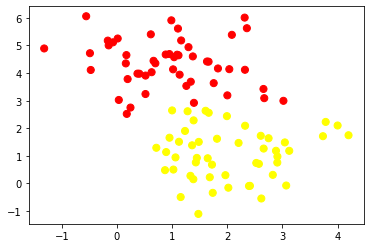

In [4]:
# 将样本数据绘制在直角坐标系中
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

In [7]:
# SVC类的C参数，对应的是错误项的惩罚系数
# 这个系数设置得越高，容错性就越小，分隔空间的硬度也就越强
# C的默认值是1.0
model = SVC(kernel='linear', C=10.0)
model.fit(X, y)

SVC(C=10.0, kernel='linear')

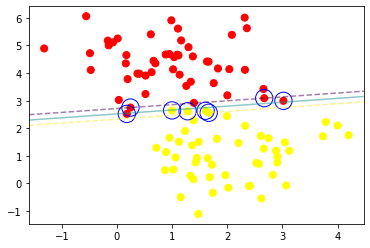

In [8]:
# 在直角坐标系中绘制分割超平面、辅助超平面和支持向量
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision(model)
plt.show()